In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

## Review

In [17]:
census = Table.read_table("nc-est2019-agesex-res.csv")
census.show(6)

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281


**Discussion Question**: I would like to write a function to allow a user to plot the estimate of the population for a given year (2010 through 2020) among a certain demographic ("males", "females", everyone).

Which parts of the following code need to be generalized to write this function?

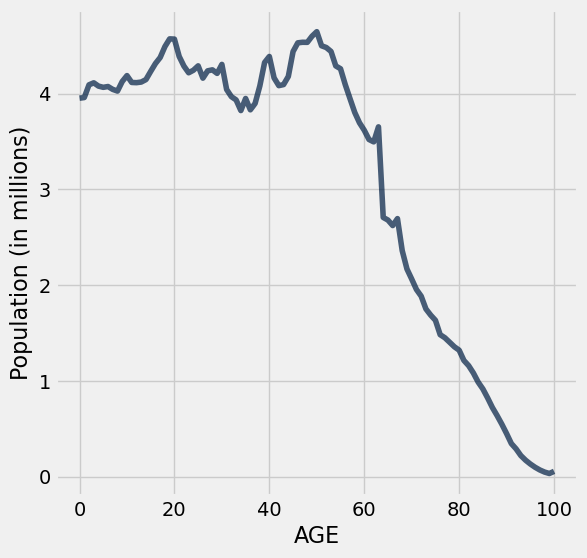

In [35]:
my_census_table = census.where('SEX',0).select('AGE',
                                'POPESTIMATE2010').where('AGE',are.below(999))

my_census_table.with_columns('Population (in millions)', 
                             my_census_table.column(1)/1e6).plot('AGE',
                                                                 'Population (in millions)')

## New material

### Cross-classify with **two-group columns**

In [32]:
cones = Table.read_table("cones.csv")
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [33]:
cones.group(['Flavor','Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [34]:
cones.group(['Flavor','Color'], np.average)

Flavor,Color,Price average
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,4.4


### Cross-classify with **pivoting**

In [5]:
cones.pivot('Flavor','Color')

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [6]:
cones.pivot('Flavor','Color','Price',np.average)

Color,bubblegum,chocolate,strawberry
dark brown,0,5.25,0
light brown,0,4.75,0
pink,4.75,0,4.4


_______

### Know when to use grouping vs. pivoting!

In [37]:
# https://corgis-edu.github.io/corgis/csv/skyscrapers/
skyscrapers = Table.read_table('skyscrapers.csv')
skyscrapers.show(6)

name,material,city,height,completed
One World Trade Center,mixed/composite,New York City,541.3,2014
Willis Tower,steel,Chicago,442.14,1974
432 Park Avenue,concrete,New York City,425.5,2015
Trump International Hotel & Tower,concrete,Chicago,423.22,2009
Empire State Building,steel,New York City,381,1931
Bank of America Tower,mixed/composite,New York City,365.8,2009


#### **Task:** 
- For each city, find the tallest building per material, as of 2016.

In [39]:
skyscrapers.select('material', 'city', 
                   'height').group(['city', 'material'], collect=max)

city,material,height max
Atlanta,concrete,264.25
Atlanta,mixed/composite,311.8
Atlanta,steel,169.47
Austin,concrete,208.15
Austin,steel,93.6
Baltimore,concrete,161.24
Baltimore,steel,155.15
Boston,concrete,121.92
Boston,mixed/composite,139
Boston,steel,240.79


#### **Task:** 
- For each city, find the height difference between the tallest steel building and the tallest concrete building.

In [43]:
skyscrapers_pivoted = skyscrapers.pivot('material', 'city', 
                                        values='height', collect=max)
skyscrapers_pivoted.show()

city,concrete,mixed/composite,steel
Atlanta,264.25,311.8,169.47
Austin,208.15,0,93.6
Baltimore,161.24,0,155.15
Boston,121.92,139,240.79
Charlotte,265.48,239.7,179.23
Chicago,423.22,306.94,442.14
Cincinnati,125,202.69,175
Cleveland,125,288.65,215.8
Columbus,79.25,0,169.3
Dallas,176.48,280.72,270.06


In [47]:
skyscrapers_pivoted = skyscrapers_pivoted.with_column(
    'difference', 
    abs(skyscrapers_pivoted.column('steel') - 
        skyscrapers_pivoted.column('concrete'))
)

In [48]:
skyscrapers_pivoted.sort('difference', True)

city,concrete,mixed/composite,steel,difference
Sunny Isles Beach,196,0,0,196
Las Vegas,350.22,195.68,164.6,185.62
Miami Beach,170.39,0,0,170.39
Pittsburgh,89.3,172,256.34,167.04
Los Angeles,145.7,118.26,310.29,164.59
Philadelphia,157.89,296.73,288.04,130.15
Boston,121.92,139,240.79,118.87
Austin,208.15,0,93.6,114.55
Seattle,138.69,284.38,235.31,96.62
Atlanta,264.25,311.8,169.47,94.78


**Discussion Question**: I would like to make a visualization of the distribution of material types of buildings among each of San Francisco, New York and Chicago. Which cross-classification method is best for this? 
- *Hint:* Which cross classification method produces a table which can be used to create the plot?

_______

### Combine information in different tables via **joining**

In [10]:
drinks = Table().with_columns("Drink", make_array('Milk Tea', 'Espresso', 'Latte','Espresso'),
                              "Cafe", make_array('Asha','Strada','Strada','FSM'),
                              "Price", make_array(5.5,1.75,3.25,2))
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [11]:
discounts = Table().with_columns("Coupon", make_array('10%','25%','5%'),
                                "Location",make_array('Asha','Strada','Asha'))
discounts

Coupon,Location
10%,Asha
25%,Strada
5%,Asha


In [14]:
drinks.join('Cafe',discounts,'Location')

Cafe,Drink,Price,Coupon
Asha,Milk Tea,5.5,10%
Asha,Milk Tea,5.5,5%
Strada,Espresso,1.75,25%
Strada,Latte,3.25,25%


In [15]:
discounts.join('Location',drinks,'Cafe')

Location,Coupon,Drink,Price
Asha,10%,Milk Tea,5.5
Asha,5%,Milk Tea,5.5
Strada,25%,Espresso,1.75
Strada,25%,Latte,3.25
